# Unconstrained Optimization

This notebook supports material covered in the class for local *unconstrained* optimization. We will be using `scipy.optimize` module for minimizing example functions mentioned below.

1. [Bean Function](#Bean-Function)</br>
2. [Rosenbrock Function](#Rosenbrock-Function)

Going through the following documentation will help in understanding the code:

1. [Scipy minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
2. [Matplotlib Contour plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)

Below block of code imports all the required packages:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import matplotlib.colors as colors

## Bean Function

Consider the bean function described below.

$$
    f(x_1,x_2) = (1 - x_1)^2 + (1 - x_2)^2 + \frac{1}{2}(2x_2 - x_1^2)^2
$$

**Question**: Plot the function contours.

**Answer**: Below block of code defines a function which returns value of bean function at any given $x$. Read comments for more details.

In [26]:
def bean_function(x):
    """
        Function which calculates the bean function value at given x.
        
        Input:
        x - a 1D/2D numpy array of shape (2,) or (1,2)
    """

    # Number of dimensions of input
    dim = x.ndim

    # To ensure n x 2
    if dim == 1:
        x = x.reshape(1,-1)

    x1 = x[:,0]
    x2 = x[:,1]

    y = (1 - x1)**2 + (1 - x2)**2 + (2*x2 - x1**2)**2 / 2

    y = y.reshape(-1,1)
    
    if dim == 1:
        y = y.reshape(-1,)

    return y

def plot_bean_function():

    num_points = 100

    # Defining x and y values
    x = np.linspace(-2,2,num_points)
    y = np.linspace(-1,3,num_points)

    # Creating a mesh at which values and 
    # gradient will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z = bean_function(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)

    # Contour levels are evaluated in logscale since the difference
    # between minimum and maximum value of function is large.
    noOfLevels = 30
    levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

    # Defining normalization which is used to normalize the function values
    # before mapping with color. We need to use this since levels for contour
    # is defined on log scale
    norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())

    # Plotting the filled contours
    fig, ax = plt.subplots(figsize=(7,5))
    CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
    fig.colorbar(CS, format='%.2e', orientation='vertical')
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title("Bean Function", fontsize=14)

    return ax

Below block of code makes a contour plot of bean function using the function defined in previous block. Read comments for more details.

<Axes: title={'center': 'Bean Function'}, xlabel='$x_1$', ylabel='$x_2$'>

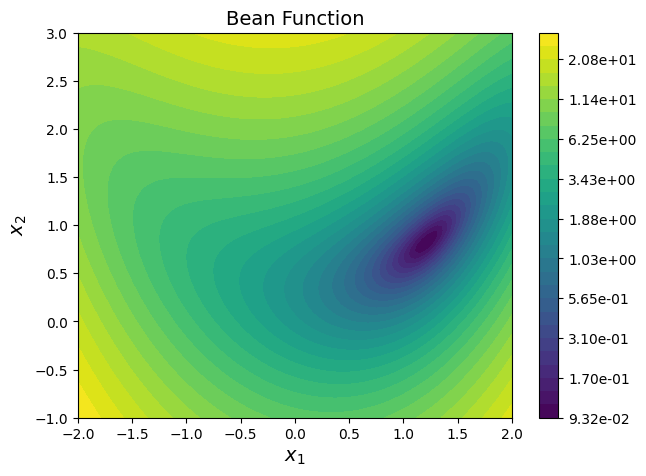

In [27]:
plot_bean_function()

**Question**: Use *Conjugate Gradient* and *BFGS* method for minimizing this function.

**Answer**: Below block of code defines three functions which are used irrespective of the solver. First two are used during the optimization and last one is used for plotting the optimization convergence results. Read comments in the function for more details.

In [39]:
def bean_callback(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, and function value which is later
        for plotting convergence history.
        
        Input: 1d numpy array which contains current x value
        Output: None
    """
    
    history["x1"].append(x[0])
    history["x2"].append(x[1])
    history["f"].append(bean_function(x))
    
def bean_func_opt_plots(history, method):
    """
        Function used for plotting the results of the optimization.
        
        Input: 
        history - A dictionary which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.
        
        method - A string which denotes the method used for optimization.
        It is only used in the title of the plots.
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["x1"]) - 1
    
    num_points = 100

    # Defining x and y values
    x = np.linspace(-2,2,num_points)
    y = np.linspace(-1,3,num_points)

    # Creating a mesh at which values 
    # will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z = bean_function(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)

    # Plotting the convergence history
    fig, ax = plt.subplots(figsize=(6,5))
    ax.plot(np.arange(num_itr+1), history["x1"], "k", marker=".", label="$x_1$")
    ax.plot(np.arange(num_itr+1), history["x2"], "b", marker=".", label="$x_2$")
    ax.plot(np.arange(num_itr+1), history["f"], "g", marker=".", label="$f$")
    ax.set_xlabel("Iterations", fontsize=14)
    ax.set_xlim(left=0, right=num_itr)
    ax.set_ylabel("Quantities", fontsize=14)
    ax.grid()
    ax.legend(fontsize=12)
    ax.set_title("Convergence history - " + method, fontsize=14)

    ax = plot_bean_function()
    ax.scatter(x0[0], x0[1], label="Starting point", c="red")
    ax.scatter(result.x[0], result.x[1], label="Final point", c="orange")
    ax.plot(history["x1"], history["x2"], "k", marker=".", label="Path")
    ax.set_title("Path of optimizer - " + method, fontsize=14)

Below block of code defines various parameters for optimization using **Conjugate Gradient** method.

Optimization terminated successfully.
         Current function value: 0.091944
         Iterations: 10
         Function evaluations: 90
         Gradient evaluations: 18
Value of x1 at optimum: 1.2134116592747848
Value of x2 at optimum: 0.8241226173724079


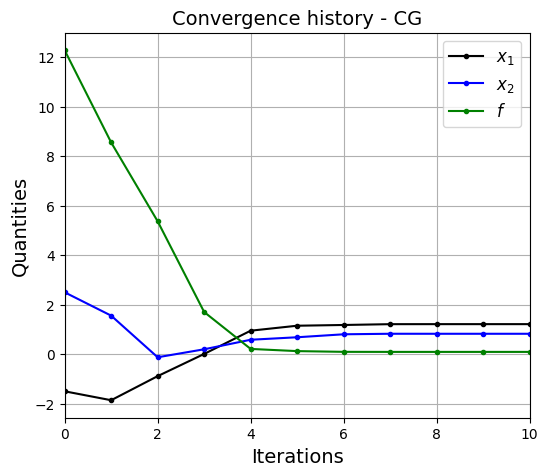

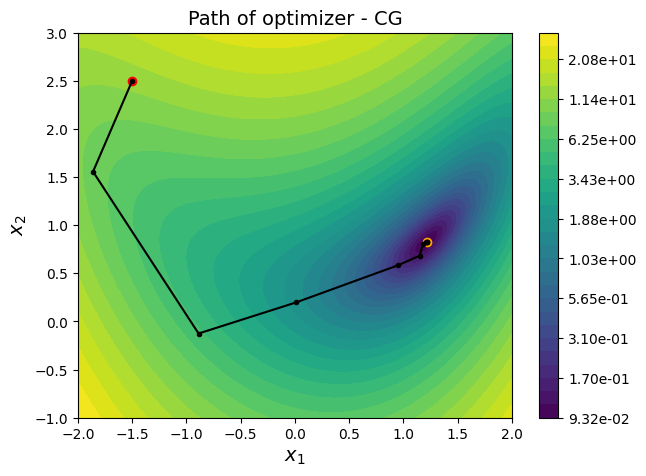

In [40]:
# Starting point
x0 = np.array([-1.5, 2.5])

# Solver
method = "CG"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "3-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [bean_function(x0)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=bean_function, x0=x0, method=method, jac=jac, callback=bean_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
bean_func_opt_plots(history, method=method)

Below block of code defines various parameters for optimization using **BFGS** method.

Optimization terminated successfully.
         Current function value: 0.091944
         Iterations: 10
         Function evaluations: 60
         Gradient evaluations: 12
Value of x1 at optimum: 1.2134128900699837
Value of x2 at optimum: 0.8241227928676157


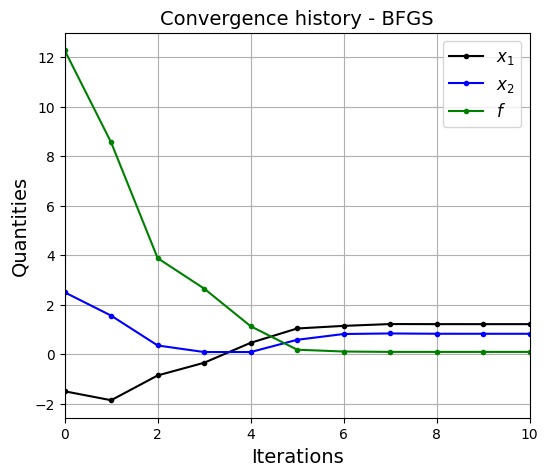

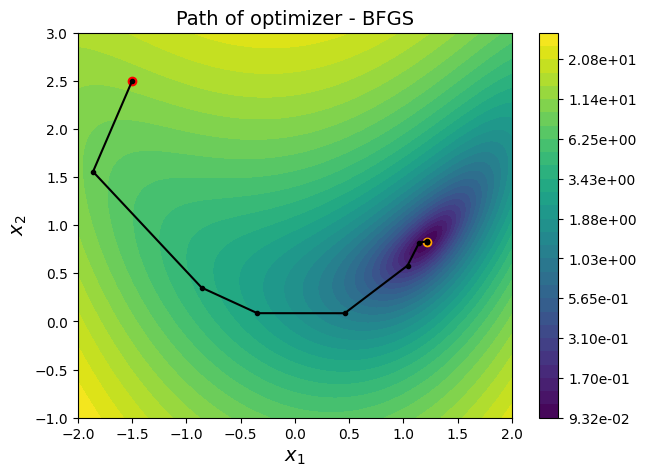

In [41]:
# Starting point
x0 = np.array([-1.5, 2.5])

# Solver
method = "BFGS"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "3-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [bean_function(x0)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=bean_function, x0=x0, method=method, jac=jac, callback=bean_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
bean_func_opt_plots(history, method=method)

## Rosenbrock Function

Consider the **rosenbrock function** described below.

$$
    f(x_1,x_2) = (a - x_1)^2 + b(x_2 - x_1^2)^2
$$

Typically, $a$ is set to 1 and $b$ is set to 100.

**Question**: Plot the function contours.

**Answer**: Below block of code defines a function which returns value of bean function at any given $x$.

In [52]:
def rosenbrock_function(x):
    """
        Function which calculates the rosenbrock function value at given x.
        
        Input:
        x1 - first variable in rosenbrock function. Can be an int, float, or numpy array.
        x2 - second variable in rosenbrock function. Can be an int, float, or numpy array.
        
        Note: size and type of both the inputs should be same.
    """

    # Number of dimensions of input
    dim = x.ndim

    # To ensure n x 2
    if dim == 1:
        x = x.reshape(1,-1)

    x1 = x[:,0]
    x2 = x[:,1]
    
    a = 1
    b = 100
    
    y = (a - x1)**2 + b*(x2 - x1**2)**2

    y = y.reshape(-1,1)

    if dim == 1:
        y = y.reshape(-1,)
    
    return y

def plot_rosenbrock_function():

    num_points = 100

    # Defining x and y values
    x = np.linspace(-2,2,num_points)
    y = np.linspace(-2,2,num_points)

    # Creating a mesh at which values and 
    # gradient will be evaluated and plotted
    X, Y = np.meshgrid(x, y)

    # Evaluating the function values at meshpoints
    Z = rosenbrock_function(np.hstack((X.reshape(-1,1),Y.reshape(-1,1)))).reshape(num_points,num_points)

    # Contour levels are evaluated in logscale since the difference
    # between minimum and maximum value of function is large.
    noOfLevels = 40
    levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

    # Defining normalization which is used to normalize the function values
    # before mapping with color. We need to use this since levels for contour
    # is defined on log scale
    norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())

    # Plotting the filled contours
    fig, ax = plt.subplots(figsize=(7,5))
    CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
    fig.colorbar(CS, format='%.2e', orientation='vertical')
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$x_2$", fontsize=14)
    ax.set_title("Rosenbrock Function", fontsize=14)

    return ax

<Axes: title={'center': 'Rosenbrock Function'}, xlabel='$x_1$', ylabel='$x_2$'>

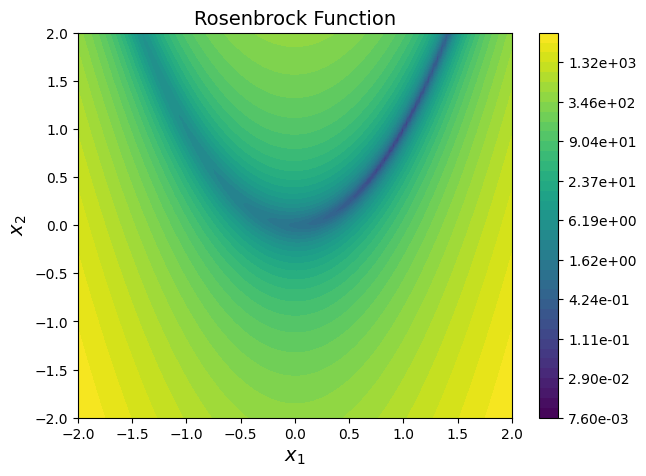

In [53]:
plot_rosenbrock_function()

**Question**: Use *conjugate gradient* and *BFGS* method for minimizing the rosenbrock function.

**Answer**: Below block of code defines three functions which are used irrespective of the solver. First two are used during the optimization and last one is used for plotting the optimization convergence results. Read comments in the function for more details.

In [54]:
def rosen_callback(x):
    """
        Function which is called after every iteration of optimization.
        It stores the value of x1, x2, and function value.
        
        Input: Current x value
        Output: None
    """
    
    history["x1"].append(x[0])
    history["x2"].append(x[1])
    history["f"].append(rosenbrock_function(x))

def rosen_func_opt_plots(history, method):
    """
        Function used for plotting the results of the optimization.
        
        Input: 
        history - A dict which contains three key-value pairs - x1, x2, and f.
        Each of this pair should be a list which contains values of 
        the respective quantity at each iteration. Look at the usage of this
        function in following blocks for better understanding.
        
        method - A str which denotes the method used for optimization.
        It is only used in the title of the plots.
    """
    
    # Number of iterations.
    # Subtracting 1, since it also contains starting point
    num_itr = len(history["x1"]) - 1

    # Plotting the convergence history
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    
    # DV history
    ax[0].plot(np.arange(num_itr+1), history["x1"], "k", marker=".", label="$x_1$")
    ax[0].plot(np.arange(num_itr+1), history["x2"], "b", marker=".", label="$x_2$")
    ax[0].set_xlabel("Iterations", fontsize=14)
    ax[0].set_xlim(left=0, right=num_itr)
    ax[0].set_ylabel("$x_1$ and $x_2$", fontsize=14)
    ax[0].grid()
    ax[0].legend(fontsize=12)
    
    # function history
    ax[1].plot(np.arange(num_itr+1), history["f"], "b", marker=".", label="$f$")
    ax[1].set_xlabel("Iterations", fontsize=14)
    ax[1].set_xlim(left=0, right=num_itr)
    ax[1].set_yscale('log')
    ax[1].set_ylabel("$y$", fontsize=14)
    ax[1].grid()
    
    fig.suptitle("Convergence history - " + method, fontsize=14)

    # Plotting path of optimizer
    ax = plot_rosenbrock_function()
    ax.plot(history["x1"], history["x2"], "k", marker=".", label="Path")
    ax.scatter(x0[0], x0[1], label="Starting point", c="red")
    ax.scatter(result.x[0], result.x[1], label="Final point", c="orange")
    ax.set_title("Path of optimizer - " + method, fontsize=14)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 207
         Gradient evaluations: 69
Value of x1 at optimum: 0.9999955232110469
Value of x2 at optimum: 0.9999910177196754


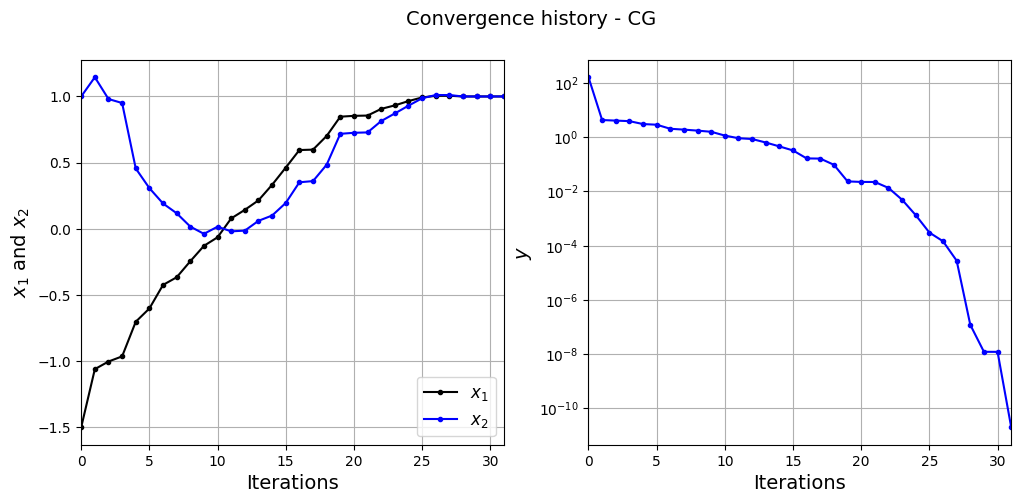

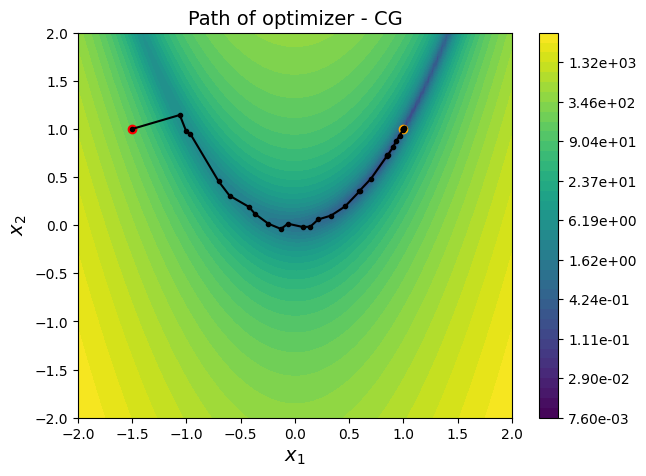

In [55]:
# Starting point
x0 = np.array([-1.5, 1.0])

# Solver
method = "CG"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "2-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [rosenbrock_function(x0)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=rosenbrock_function, x0=x0, method=method, jac=jac, callback=rosen_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
rosen_func_opt_plots(history, method=method)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 99
         Gradient evaluations: 33
Value of x1 at optimum: 0.9999955486139519
Value of x2 at optimum: 0.999991089392425


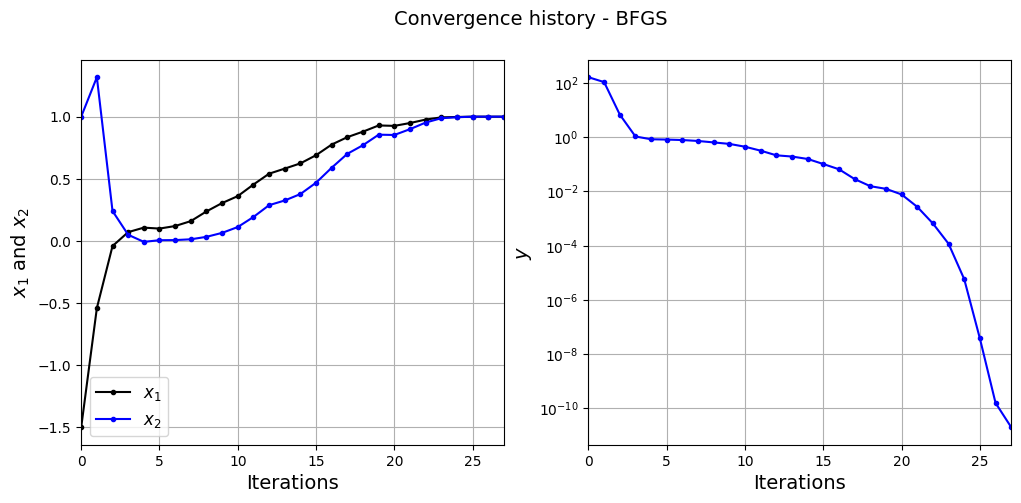

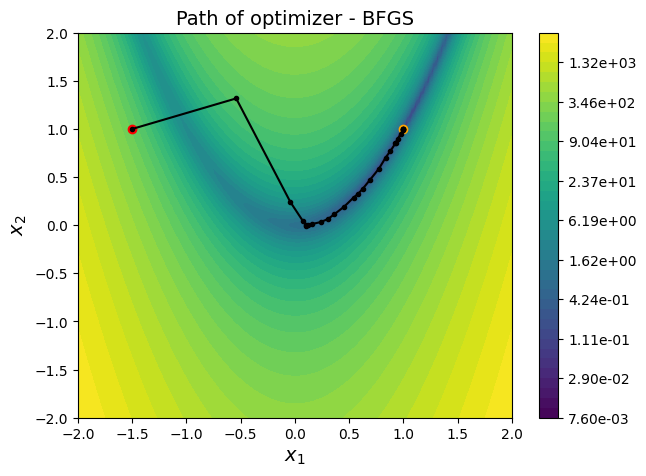

In [56]:
# Starting point
x0 = np.array([-1.5, 1.0])

# Solver
method = "BFGS"

# Defines which finite difference scheme to use. Possible values are:
# "2-point" - forward/backward difference
# "3-point" - central difference
# "cs" - complex step
jac = "2-point"

# Defining dict for storing history of optimization
history = {}
history["x1"] = [x0[0]]
history["x2"] = [x0[1]]
history["f"] = [rosenbrock_function(x0)]

# Solver options
options ={
    "disp": True
}

# Minimize the function
result = minimize(fun=rosenbrock_function, x0=x0, method=method, jac=jac, callback=rosen_callback, options=options)

# Print value of x
print("Value of x1 at optimum: {}".format(result.x[0]))
print("Value of x2 at optimum: {}".format(result.x[1]))

# Convergence plots
rosen_func_opt_plots(history, method=method)